# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
housing_prices = city_data.target
housing_features = city_data.data

# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: ** I think that three features that will correlate closely with the median home-value are:

1. `CRIM`, which represents the per capita crime rate
2. `RM`, average number of rooms per dwelling
3. `AGE`, which represents the proportion of owner-occupied units built prior to 1940

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES[0][0],CLIENT_FEATURES[0][5],CLIENT_FEATURES[0][6]

11.95 5.609 90.0


**Answer: ** For the dwelling the current client is looking at this corresponds to values of

1. `CRIM - 11.95`
2. `RM - 5.609`
3. `AGE - 90.0`

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [4]:
# Put any import statements you need for this code block here

from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** In order to perform our analysis, we split the data into two sets, a training set and a testing set.  The training set will be used to the train the model.  The testing set will be used to test the validity of the model being trained.  If we did not reserve some of our data for testing then when we used data to test the validity, this data would have been used in the formation of the model.  We would expect any data that had been used to form the model to fit the model well.  With test data we can see how well data not used to form the model fits with the model that was formed.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [5]:
# Put any import statements you need for this code block here

from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_absolute_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** 

The essential nature of machine learning is that we develop a statistical model that is capable of optimizing with regard to the degree of error it generates given known data.  We must begin our work by selecting an appropriate performance metric we will use to measure this error.  Scikit-learn has several built-in tools for quantifying error.  In this work, our target variable is continuous, making the prediction of the variable a regression rather than classification problem.  Scikit-learn several regression metrics, we consider these: 

- [`metrics.median_absolute_error(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error)  
    Median absolute error regression loss  
- [`metrics.mean_squared_error(y_true, y_pred[, ...])`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)  
    Mean squared error regression loss 

In researching these two metrics, I learned the following:

  > Both the root mean square error (RMSE) and the mean absolute error (MAE) are regularly employed in model evaluation studies. [^Chai]

  > The mean absolute error ...  is less sensitive to the occasional very large error because it does not square the errors in the calculation. [^rnau]

  > The root mean squared error is more sensitive than other measures to the occasional large error: the squaring process gives disproportionate weight to very large errors.  If an occasional large error is not a problem in your decision situation (e.g., if the true cost of an error is roughly proportional to the size of the error, not the square of the error), then the MAE or MAPE may be a more relevant criterion.

  > There is no absolute criterion for a "good" value of RMSE or MAE: it depends on the units in which the variable is measured and on the degree of forecasting accuracy, as measured in those units, which is sought in a particular application.  Depending on the choice of units, the RMSE or MAE of your best model could be measured in zillions or one-zillionths.  It makes no sense to say "the model is good (bad) because the root mean squared error is less (greater) than x", unless you are referring to a specific degree of accuracy that is relevant to your forecasting application. [^Hyndmand_Koehler]

   > If an occasional large error is not a problem in your decision situation (e.g., if the true cost of an error is roughly proportional to the size of the error, not the square of the error), then the MAE or MAPE may be a more relevant criterion. [^rnau]

Based upon this, I chose to use the Mean Absolute Error as performance metric.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [6]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model
try:
    reg = fit_model(X_train, y_train)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** Grid search takes a given model, a set of parameters, and a set of values for each of these parameters and compares the performance of the model against each permutation of the parameter values in sequence.  The goal is to fine-tune the model against the parameters, finding the parameter against which the model performs best.


## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross validation is a process by which a training set of data is split into $K$ sets.  A train-test analysis is then performed against these sets reserving a different individual set as the test set in each pass.  Using cross validation with grid search effectively multiplies the number of validation analyses performed against our model.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


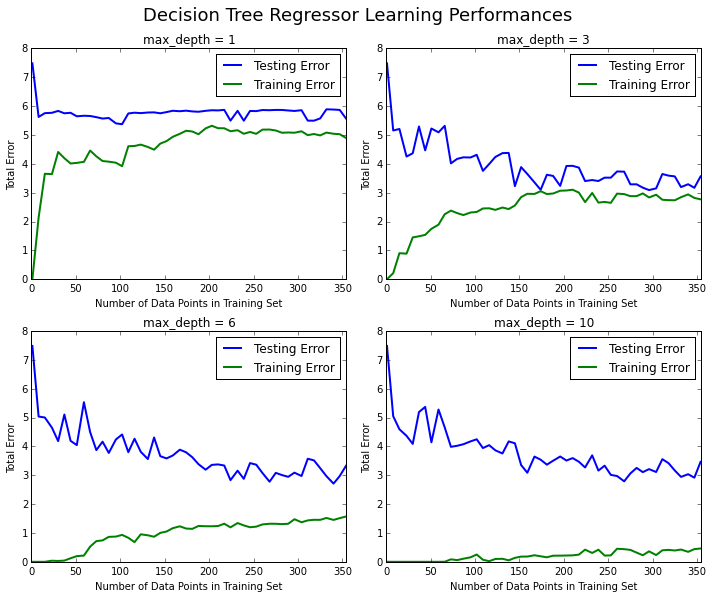

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?* 

**Answer: **   Considering _training error_ for a max depth of 1, there is an initial rapid spike in error, after which the error settles down.  This occurs around $n=50$.  Following this, the error is fairly linear with a slow increase in the size of training error. For a max depth of 6, there is no initial spike in the training error and the error more rapidly settles into a nearly linear increase. Looking at a max depth of 10, we can see that the error curve of the training data improves significantly as we increase the depth of our decision tree.

Considering _testing error_ all depths begins with a large spike and settle down by n=50.  For all depths, beyond $n=50$, the number of points being used is largely irrelevant. 

It is extremely important that while training data performance improves significantly increases with decision tree depth, test data performance does not.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** The plot for a depth of 1 is definitely underfit and suffers from high bias.  The error for a depth of 10 would indicate overfitting or high variance in that the error for the training data is 0 for all $n#, but the error for the test data is nearly the same as that for a depth of greater than 6 and is very large compared to the training data. 

Creating a model complexity graph. . . 


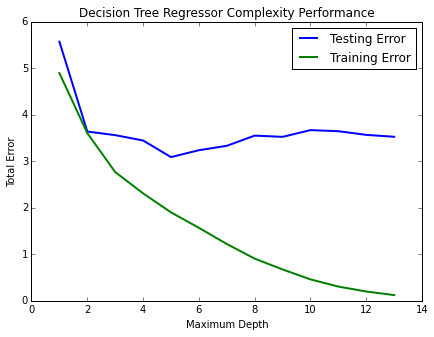

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **   In analyzing our Model Complexity plot, we are essentially looking at the Bias-Variance Trade-Off .  While mean absolute error was used as a performance metric, consider the following.  For mean square error, the expected test MSE is given by [^jamesstat]  

  $$\mathbb{E}\left(y_0-\hat{f}(x_0)\right)^2=\text{Var}(\hat{f}(x_0))+\left[\text{Bias}(\hat{f}(x_0))\right]^2+\text{Var}(\epsilon)$$

  With the Variance and the Bias both positive numbers and Var$(\epsilon)$, i.e. the error inherent to the data itself and thus independent of the model, we seek to simultaneously minimize the Variance and the Bias.  With lesser complexity, a lower max depth, we have an oversimplified model which corresponds to underfitting or increased bias.  With higher complexity, a higher max depth, we have overfitting or high variance.  The trade-off between the two corresponds to the U-shape of the plot of test error versus model complexity.  The minimum of this plot represent the point where a given complexity simultaneously minimizes variance and bias.

  It would appear that the test data error has a minimum near a depth of 6, while training error continues to decrease asymptotically as depth increases.  Based upon this the error would decrease as depth increases until the depth of 6, after which it would increase, suffering from over fitting.  This would signify that with a model depth of less than six we have an underfit model and with a model depth of higher than six we have an overfit model.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [11]:
X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
reg = fit_model(X_train, y_train)

best_params = []
sale_price  = []

for _ in range(10):
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    reg = fit_model(X_train, y_train)
    best_params.append(reg.best_params_['max_depth'])
    sale_price.append(reg.predict(CLIENT_FEATURES)[0])

print "Final model optimal parameters:", np.mean(np.array(best_params))
print "Predicted value of client's home: {0:.3f}".format(np.mean(np.array(sale_price)))

Final model optimal parameters: 5.8
Predicted value of client's home: 20.673


**Answer: **  In analyzing the model complexity plot, we estimated that an optimal depth would be 6. The result here finds an optimal depth (over ten trials) of 5.8. Earlier, we calculated that the mean house price for a home in the dataset was $22.533, with a standard deviation of house price of 9.188. Both of the values returned by our model are reasonable and match the expectations of our earlier work. 

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **  As humans, we have little intuition for a 13-dimensional domain.  In order to make full use of the dataset we were given, we need to used an advanced regression model. For this work, we use a [decision tree](http://scikit-learn.org/stable/modules/tree.html) as our regressor.  Decision trees are used in both classification and regression analyses, and are perfectly suited to supervised learning.  The decision tree is used to train a model that can predict the value of a target variable.  It works well for our regression in which we are seeking to predict the target value of median value of an owner owner-occupied home.  The decision tree itself predicts which is the most relevant of the feature variables being passed to the model (at each decision node) and thus much of the work of the tree is largely out of our hands.  One parameter over which we do have some control is the depth of the tree regression. 

One of the major disadvantages of decision tree regression is a tendency to overfit, particularly with data sets with a large number of features.  Given our 13-feature set, we certainly run this risk.  The best way in which we can prevent overfitting is by setting a maximum depth for our decision tree.  To find an ideal maximum depth, we perform a series of regressions using varying decision tree depths.  We performed this analysis both manually and using a grid search, cross-validation.  As such the technique makes use of the large data set and does so in a wholly reasonable fashion. 

[^Chai]: Chai, Tianfeng, and Roland R.  Draxler.  "Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature." Geoscientific Model Development 7.3 (2014): 1247-1250.

[^rnau]: http://people.duke.edu/~rnau/compare.htm

[^Hyndmand_Koehler]: Hyndman, Rob J., and Anne B.  Koehler.  "Another look at measures of forecast accuracy." International journal of forecasting 22.4 (2006): 679-688.

[^jamesstat]: James, G., Witten, D., Hastie, T., & Tibshirani, R.  (2013).  An introduction to statistical learning (p.  6).  New York: springer.  Chicago

[^ibid]: Ibid.